<a href="https://colab.research.google.com/github/RoshanPanda/pytorch/blob/master/Feed_forward_neural_network_with_make_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [5]:
torch.cuda.is_available()

False

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as func
import matplotlib.pyplot as plt
import sklearn.datasets

In [0]:
x,y=sklearn.datasets.make_moons(200,noise=0.20)



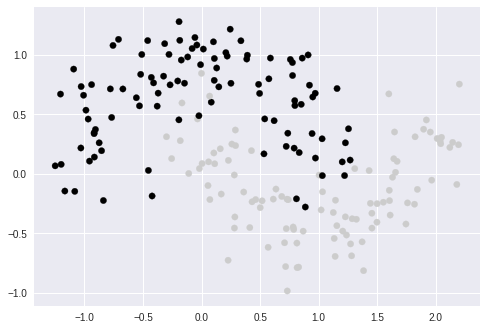

In [31]:
plt.scatter(x[:,0],x[:,1],s=40,cmap=plt.cm.spectral,c=y)

In [0]:
x=torch.FloatTensor(x)
y=torch.LongTensor(y)

In [0]:
class FeedForward(torch.nn.Module):
  def __init__(self, input_neuron,hidden_neuron,output_neuron):
    super(FeedForward,self).__init__()
    self.hidden=nn.Linear(input_neuron,hidden_neuron)
    self.out=nn.Linear(hidden_neuron,output_neuron)
    #self.relu=nn.Relu()
  def forward(self,x):
    x=self.hidden(x)
    x=func.relu(x)
    x=self.out(x)
    return x
  
      
  

In [0]:
network=FeedForward(input_neuron=2, hidden_neuron=50, output_neuron=2)
optimizer=torch.optim.SGD(network.parameters(), lr=0.02)
loss_function=torch.nn.CrossEntropyLoss()

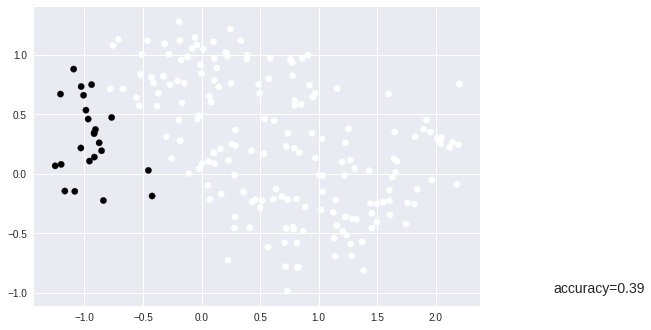

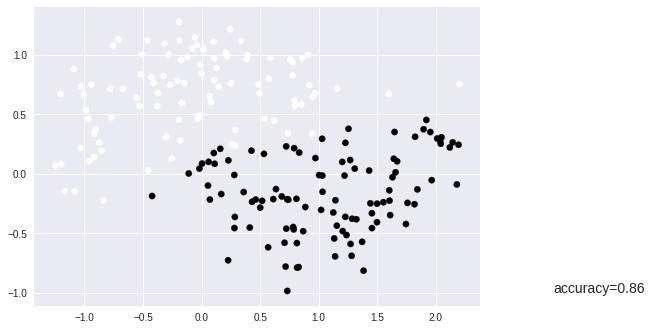

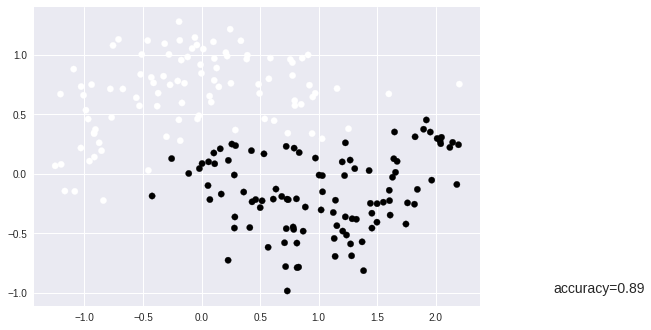

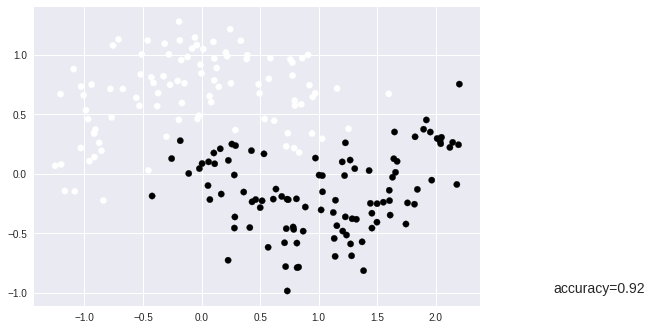

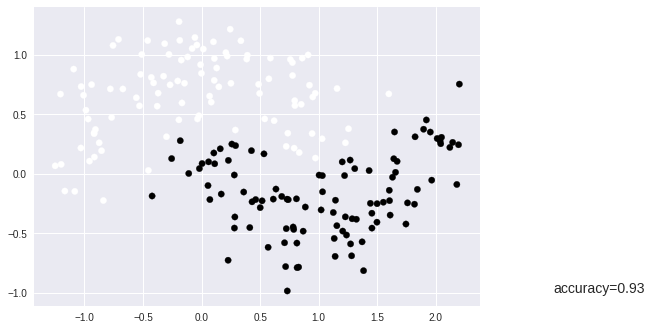

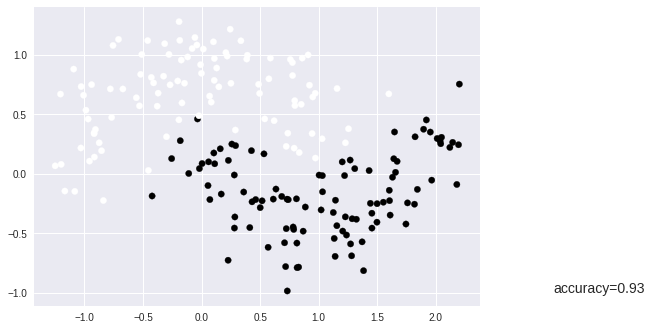

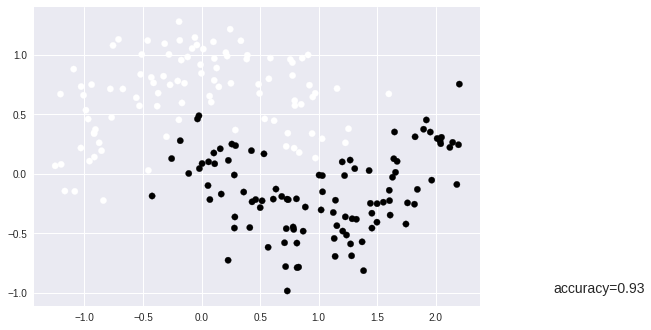

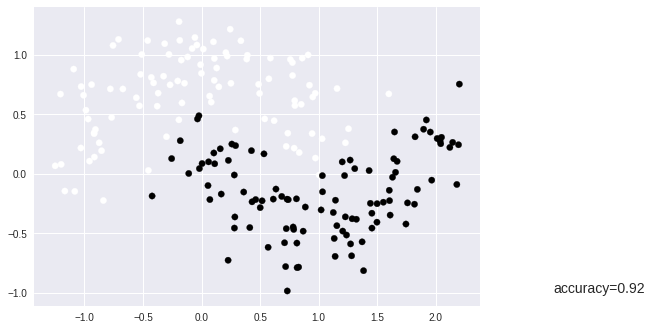

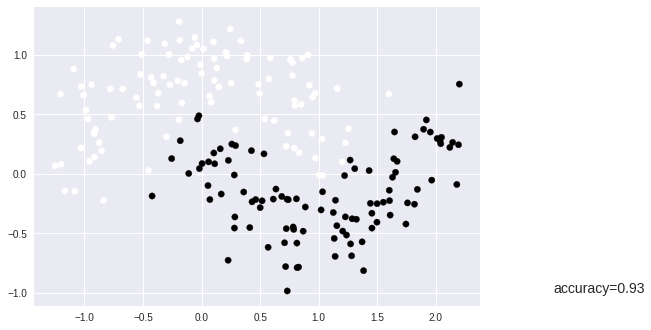

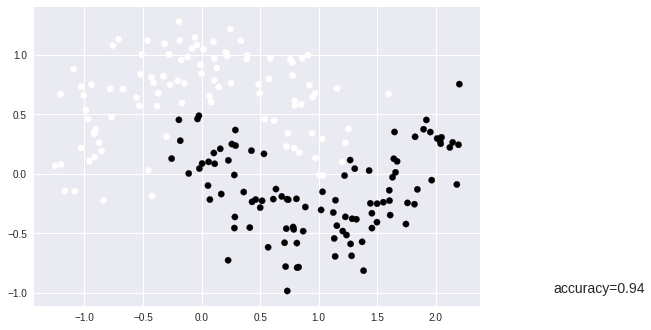

In [69]:
plt.ion()
for epoch in range(10000):
  out=network.forward(x)
  loss=loss_function(out,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 1000==0:
    max_value, prediction=torch.max(out,1)
    predicted_y=prediction.data.numpy()
    target_y=y.data.numpy()
    plt.scatter(x[:,0],x[:,1],c=predicted_y,s=40)
    accuracy=(predicted_y==target_y).sum()/target_y.size
    plt.text(3,-1,'accuracy={:.2F}'.format(accuracy),fontdict={'size':14})
    plt.pause(0.1)
    
plt.ioff()
plt.show()
    

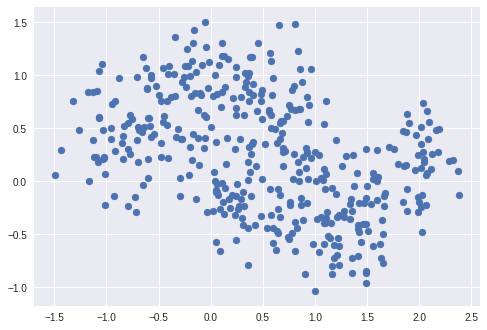

In [74]:
x1,y1=sklearn.datasets.make_moons(400,noise=0.23)
x1=torch.FloatTensor(x1)
y1=torch.LongTensor(y1)
plt.scatter(x1[:,0],x1[:,1])
plt.show()